## Setup: 
Fork git repository and clone: https://github.com/gillespielab/gl-spyglass-tables

Setup conda/mamba environment as specified in https://github.com/LorenFrankLab/spyglass/blob/master/environment.yml

In [ ]:
import datajoint as dj
import sys
import os
cwd = os.getcwd()
parent_path = os.path.abspath(os.path.join(cwd, '../..'))
sys.path.append(parent_path)

# CHANGE BEFORE COMMITTING
dj.config['database.host'] = ""
dj.config['database.user'] = ""
dj.config['database.port'] = 

from spyglass.common.common_behav import StateScriptFile
from spyglass.common.common_nwbfile import AnalysisNwbfile
from spyglass.common.common_session import Session
from gl_spyglass_tables.trial_info import TrialInfo8Arm

import numpy as np

[2025-06-04 10:18:20,873][INFO]: DataJoint 0.14.4 connected to sophie@gl-ash.biostr.washington.edu:3306


In [2]:
TrialInfo8Arm.heading

nwb_file_name        : varchar(64)                  # name of the NWB file
epoch                : int                          # the session epoch for this task and apparatus(1 based)
dio_event_name       : varchar(80)                  # the name assigned to this DIO event
---
analysis_file_name   : varchar(64)                  # name of the file
trial_info_object_id : varchar(40)                  # the NWB object ID for loading this object from the file
parser               : varchar(100)                 # type of parser used to interpret statescript log
descriptors=null     : blob                         # global descriptors for task

In [3]:
TrialInfo8Arm()

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),dio_event_name the name assigned to this DIO event,analysis_file_name name of the file,trial_info_object_id the NWB object ID for loading this object from the file,parser type of parser used to interpret statescript log,descriptors global descriptors for task
archibald20210628_.nwb,2,homebeam,archibald20210628_V4ELUROU93.nwb,7cd3a540-5056-44e9-b0a3-ab853a5b7f1e,V8_delay,=BLOB=
archibald20210628_.nwb,4,homebeam,archibald20210628_30W95IVPI5.nwb,2307d9d1-1dbf-431b-91ff-b3746a902493,V8_delay,=BLOB=
archibald20210629_.nwb,2,homebeam,archibald20210629_NK5ZUOS063.nwb,232cde9f-6953-4f69-a21f-2eaa13d0fecb,V8_delay,=BLOB=
archibald20210629_.nwb,4,homebeam,archibald20210629_QYDNJFTDGQ.nwb,faadf042-dd55-4c76-acd6-21ead1976cd9,V8_delay,=BLOB=
archibald20210630_.nwb,2,homebeam,archibald20210630_HK6U8K3BZA.nwb,6900107c-3ad5-403a-a31c-8a4758901566,V8_delay,=BLOB=
archibald20210630_.nwb,4,homebeam,archibald20210630_TV0EYOL4V1.nwb,977f8499-55b5-414c-a6a2-f99fba2c108a,V8_delay,=BLOB=
archibald20210701_.nwb,2,homebeam,archibald20210701_OSZGTUDPVT.nwb,f23fa00e-7a17-49b1-bdfe-12dd7c01b453,V8_delay,=BLOB=
archibald20210701_.nwb,4,homebeam,archibald20210701_3Y462EVDFI.nwb,aaf56108-4230-4981-8aeb-8bc429ba4674,V8_delay,=BLOB=
archibald20210702_.nwb,2,homebeam,archibald20210702_EP5Z1TM42H.nwb,acc68125-4ae2-4188-9568-4bab13432238,V8_delay,=BLOB=
archibald20210702_.nwb,4,homebeam,archibald20210702_SNS67GJL59.nwb,855e9bfd-61fc-44a2-9bb1-f12a6fd3d80a,V8_delay,=BLOB=


## Inserting epochs:
`TrialInfo.populate()` parses all StateScriptLog run sessions. Here, we we can also insert epochs from a single animal.

In [4]:
nwb_file_name = "bobrick20231205_.nwb"

In [5]:
TrialInfo8Arm.populate(StateScriptFile & {'nwb_file_name' : nwb_file_name})

/home/gl-willow/mambaforge/envs/sophie_spyglass_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/gl-willow/mambaforge/envs/sophie_spyglass_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'ndx-franklab-novela' version 0.1.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
[10:18:40][INFO] Spyglass: Skipping sleep epoch: bobrick20231205_.nwb, epoch 1
[10:18:40][INFO] Spyglass: Skipping sleep epoch: bobrick20231205_.nwb, epoch 3
[10:18:40][INFO] Spyglass: Skipping sleep epoch: bobrick20231205_.nwb, epoch 5


{'success_count': 173, 'error_list': []}

## Reading the resulting analysis file

In [6]:
# select a specific epoch for the inserted session
restr = {"nwb_file_name": nwb_file_name, "epoch": 2}

In [7]:
# accessing trial descriptors
(TrialInfo8Arm & restr).fetch1("descriptors")

{'statescript': 'V8pre_delay_locknoise_uw.sc',
 'lockout_period': 30.0,
 'python_script': 'V8.py',
 'outer_reps': [4, 13],
 'num_goals': 1,
 'forage_num': 1}

In [8]:
# fetching dataframe for the specified run epoch
df = (TrialInfo8Arm & restr).fetch1_dataframe()
df

/home/gl-willow/mambaforge/envs/sophie_spyglass_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/gl-willow/mambaforge/envs/sophie_spyglass_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'ndx-franklab-novela' version 0.1.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,trial_num,start_time,end_time,leave_home,trial_type,rw_start,rw_end,leave_rw,rw_success,outer_well,goal_well,outer_time,leave_outer,outer_success,lockout_starts,lockout_ends,during_lockout,lockout_type,search_trial
id,,,,,,,,,,,,,,,,,,,
0,1,1.701801e+09,1.701801e+09,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,1.0,0.000000e+00,0.000000e+00,0,[],[],[],0,True
1,2,1.701801e+09,1.701801e+09,1.701801e+09,1,1.701801e+09,1.701801e+09,1.701801e+09,1,4.0,1.0,1.701801e+09,1.701801e+09,0,[],[],[],0,True
2,3,1.701801e+09,1.701801e+09,1.701801e+09,1,1.701801e+09,1.701801e+09,1.701801e+09,1,1.0,1.0,1.701801e+09,1.701801e+09,1,[],[],[],0,True
3,4,1.701801e+09,1.701802e+09,1.701801e+09,2,1.701801e+09,1.701801e+09,1.701801e+09,1,3.0,1.0,1.701801e+09,1.701802e+09,0,[],[],[],0,False
4,5,1.701802e+09,1.701802e+09,1.701802e+09,2,1.701802e+09,1.701802e+09,1.701802e+09,1,0.0,1.0,0.000000e+00,0.000000e+00,0,[1701801548.7604764],[1701801578.7604764],[],1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,1.701807e+09,1.701807e+09,1.701807e+09,2,1.701807e+09,1.701807e+09,1.701807e+09,1,5.0,0.0,1.701807e+09,1.701807e+09,0,[],[],[],0,False
142,143,1.701807e+09,1.701807e+09,1.701807e+09,2,1.701807e+09,1.701807e+09,1.701807e+09,1,0.0,0.0,0.000000e+00,0.000000e+00,0,[1701806871.4784765],[1701806901.4784765],[],1,False
143,144,1.701807e+09,1.701807e+09,1.701807e+09,1,1.701807e+09,1.701807e+09,1.701807e+09,1,0.0,0.0,0.000000e+00,0.000000e+00,0,[1701806936.1184764],[1701806966.1184764],[],1,False


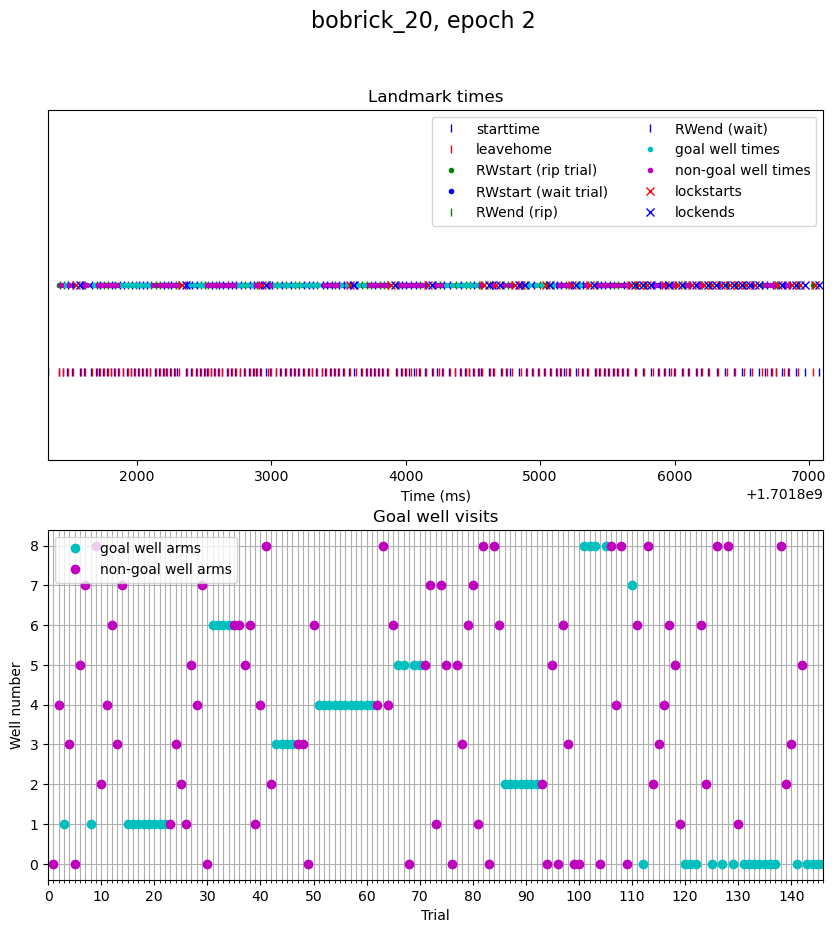

In [9]:
# optional: visualize landmark times during epoch
(TrialInfo8Arm() & restr).plot_trials()

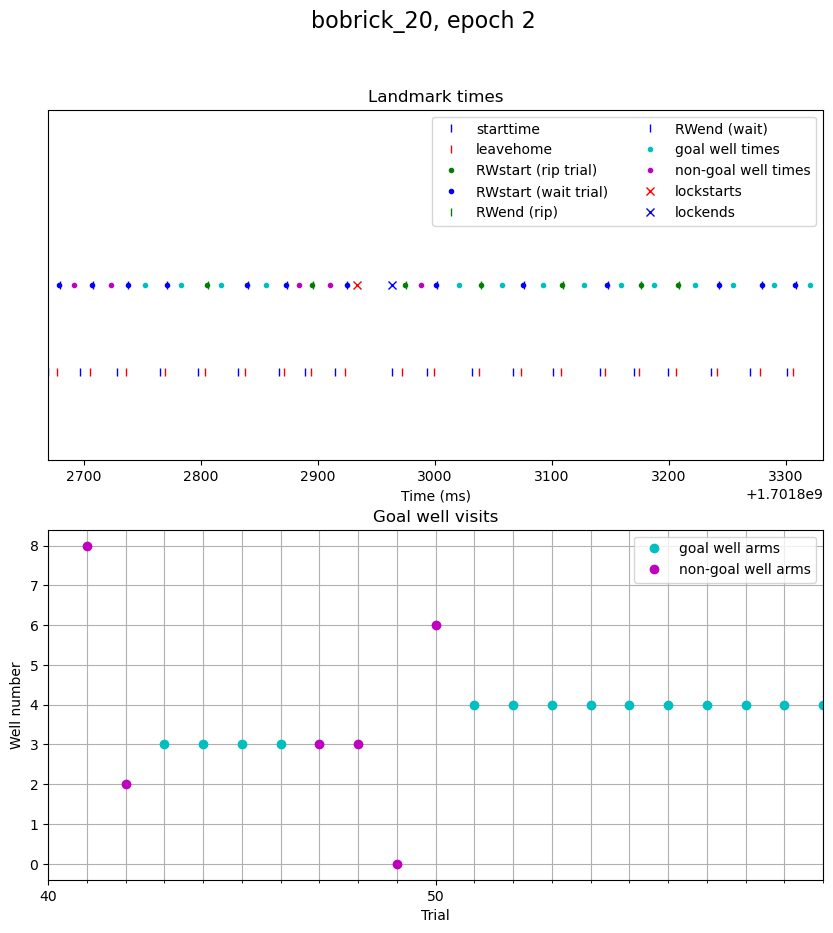

In [10]:
# alternatively, select a smaller interval of trials
(TrialInfo8Arm() & restr).plot_trials(start=40, end=60)

## Plotting Change of Mind (or any subset of) Trials

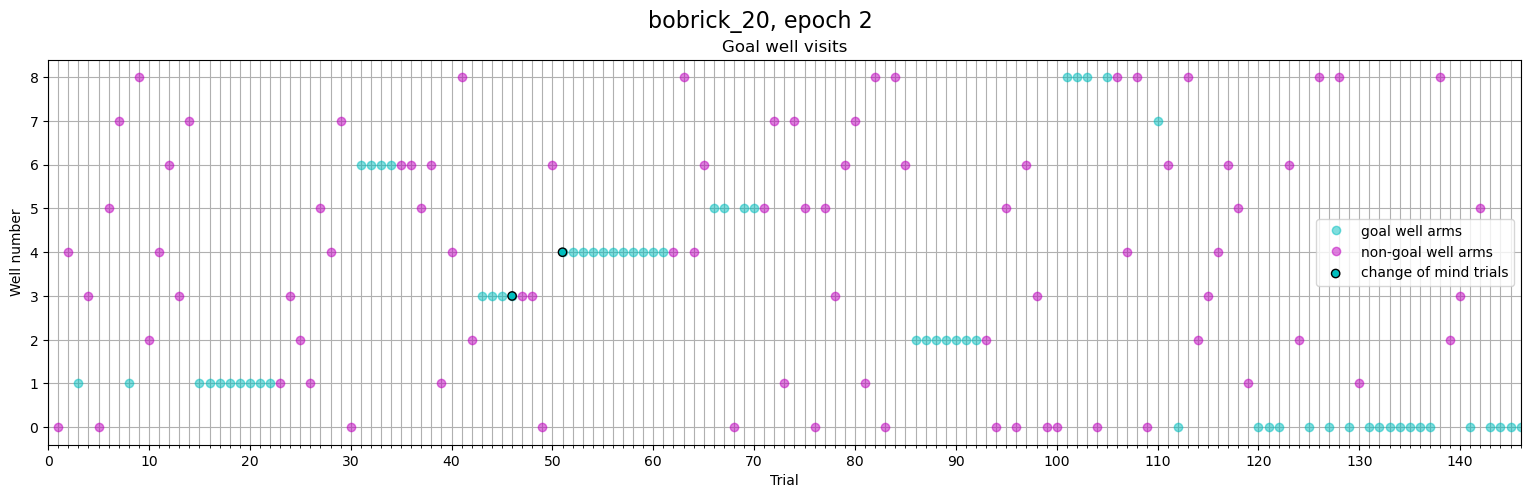

In [16]:
# bobrick20231205_.nwb epoch 2 change of mind trials
# com_trial_nums can be any array like list of increasing trial numbers that are within length of the specified epoch
com_trial_nums = [46, 51] # com_trial_nums = np.array([23, 36, 42, 144])
(TrialInfo8Arm & restr).plot_trials(com_trial_nums = com_trial_nums) 

## Deleting Entries

In [18]:
# Deletes TrialInfo entries from this session
# Removes all epochs from that day 
(TrialInfo8Arm() & {"nwb_file_name" : nwb_file_name}).delete()

[2025-06-04 10:21:35,840][INFO]: Deleting 2 rows from `trial_info`.`__trial_info8_arm`
[2025-06-04 10:21:38,587][INFO]: Deletes committed.


In [19]:
TrialInfo8Arm & {"nwb_file_name" : nwb_file_name}

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),dio_event_name the name assigned to this DIO event,analysis_file_name name of the file,trial_info_object_id the NWB object ID for loading this object from the file,parser type of parser used to interpret statescript log,descriptors global descriptors for task


In [ ]:
# Automatically deletes AnalysisNwbfile entries that are not referenced a downstream table
# AND removes the filepath entries for NWB files that are not in use.
AnalysisNwbfile.nightly_cleanup()

100%|██████████| 4/4 [00:00<00:00, 93.11it/s]
